In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
telco_df = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Portfolio Projects_storage\Day 31 - Telco Churn Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = telco_df.copy()

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.shape

(7043, 21)

In [7]:
df_objects = ['gender','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'MultipleLines' , 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies',
'Contract', 'PaymentMethod']

for cols in df_objects:
    display(df[cols].value_counts())

# Columns need to be updated 
#'gender'
#'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
#'MultipleLines' 
#'InternetService'
#'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'
#'Contract'
#'PaymentMethod'

gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

Churn
No     5174
Yes    1869
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [8]:
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [9]:
def transformed_cols (df, df_objects):
    for col in df_objects:
        if col == 'gender' and col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower().apply(lambda x: 1 if x == 'male' else 0)
        elif col == 'MultipleLines' and col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower().map({
                'no phone service':0,
                'no': 1,
                'yes': 2
            })
        elif col == 'InternetService' and col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower().map({
                'no':0,
                'dsl': 1,
                'fiber optic': 2
            })
        elif col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'] and col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower().map({
                'no internet service':0,
                'no': 1,
                'yes': 2
            })
        elif col == 'Contract' and col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower().map({
                'one year':0,
                'two year': 1,
                'month-to-month': 2
            })
        elif col == 'PaymentMethod' and col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower().map({
                'credit card (automatic)':0,
                'bank transfer (automatic)': 1,
                'mailed check': 2,
                'electronic check': 3
            })
        else:
            df[col] = df[col].astype(str).str.strip().str.lower().apply(lambda x: 1 if x == 'yes' else 0)

    return df

df = transformed_cols(df, df_objects)

In [10]:
for cols in df_objects:
    display(df[cols].value_counts())

gender
1    3549
0    3483
Name: count, dtype: int64

Partner
0    3639
1    3393
Name: count, dtype: int64

Dependents
0    4933
1    2099
Name: count, dtype: int64

PhoneService
1    6352
0     680
Name: count, dtype: int64

PaperlessBilling
1    4168
0    2864
Name: count, dtype: int64

Churn
0    5163
1    1869
Name: count, dtype: int64

MultipleLines
1    3385
2    2967
0     680
Name: count, dtype: int64

InternetService
2    3096
1    2416
0    1520
Name: count, dtype: int64

OnlineSecurity
1    3497
2    2015
0    1520
Name: count, dtype: int64

OnlineBackup
1    3087
2    2425
0    1520
Name: count, dtype: int64

DeviceProtection
1    3094
2    2418
0    1520
Name: count, dtype: int64

TechSupport
1    3472
2    2040
0    1520
Name: count, dtype: int64

StreamingTV
1    2809
2    2703
0    1520
Name: count, dtype: int64

StreamingMovies
1    2781
2    2731
0    1520
Name: count, dtype: int64

Contract
2    3875
1    1685
0    1472
Name: count, dtype: int64

PaymentMethod
3    2365
2    1604
1    1542
0    1521
Name: count, dtype: int64

In [11]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,1.325228,1.224118,1.070392,1.128697,1.127702,1.073948,1.168231,1.172213,1.341724,0.592719,1.684443,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.642585,0.778643,0.705562,0.737917,0.737415,0.707715,0.756518,0.758252,0.802308,0.491363,1.149523,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [12]:
df.corr(numeric_only= True)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.010284,-0.009643,-0.013233,-0.011081,-0.003168,-0.008215,-0.007163,-0.009072,-0.005948,-0.011902,0.004928,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.113769,0.259030,0.081766,0.144762,0.140226,0.067318,0.167123,0.176125,0.108981,0.156258,0.093712,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.118037,0.000938,0.092034,0.091536,0.099077,0.077252,0.080205,0.076076,-0.215846,-0.013957,-0.133280,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.019178,-0.177789,-0.028964,-0.061970,-0.068296,-0.040057,-0.085909,-0.099795,-0.177524,-0.110131,-0.124002,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.259112,0.031272,0.232295,0.253575,0.253834,0.230429,0.200646,0.203834,-0.505195,0.004823,-0.340939,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.674824,0.094182,-0.158997,-0.129432,-0.141055,-0.160950,-0.107242,-0.114798,0.000823,0.016696,0.003106,0.248033,0.113008,0.011691
MultipleLines,-0.010284,0.113769,0.118037,-0.019178,0.259112,0.674824,1.000000,0.308546,0.069959,0.130978,0.125447,0.069706,0.166256,0.163218,-0.040422,0.133538,-0.026248,0.491412,0.412495,0.036148
InternetService,-0.009643,0.259030,0.000938,-0.177789,0.031272,0.094182,0.308546,1.000000,0.581993,0.658487,0.662791,0.585745,0.725522,0.722592,0.202499,0.377644,0.178655,0.905389,0.428212,0.316350
OnlineSecurity,-0.013233,0.081766,0.092034,-0.028964,0.232295,-0.158997,0.069959,0.581993,1.000000,0.704598,0.701112,0.734696,0.661541,0.666682,-0.040741,0.184449,-0.035563,0.635260,0.483157,0.023014
OnlineBackup,-0.011081,0.144762,0.091536,-0.061970,0.253575,-0.129432,0.130978,0.658487,0.704598,1.000000,0.710790,0.708659,0.702605,0.699828,-0.007029,0.260691,0.003786,0.710175,0.537726,0.073934


<Axes: >

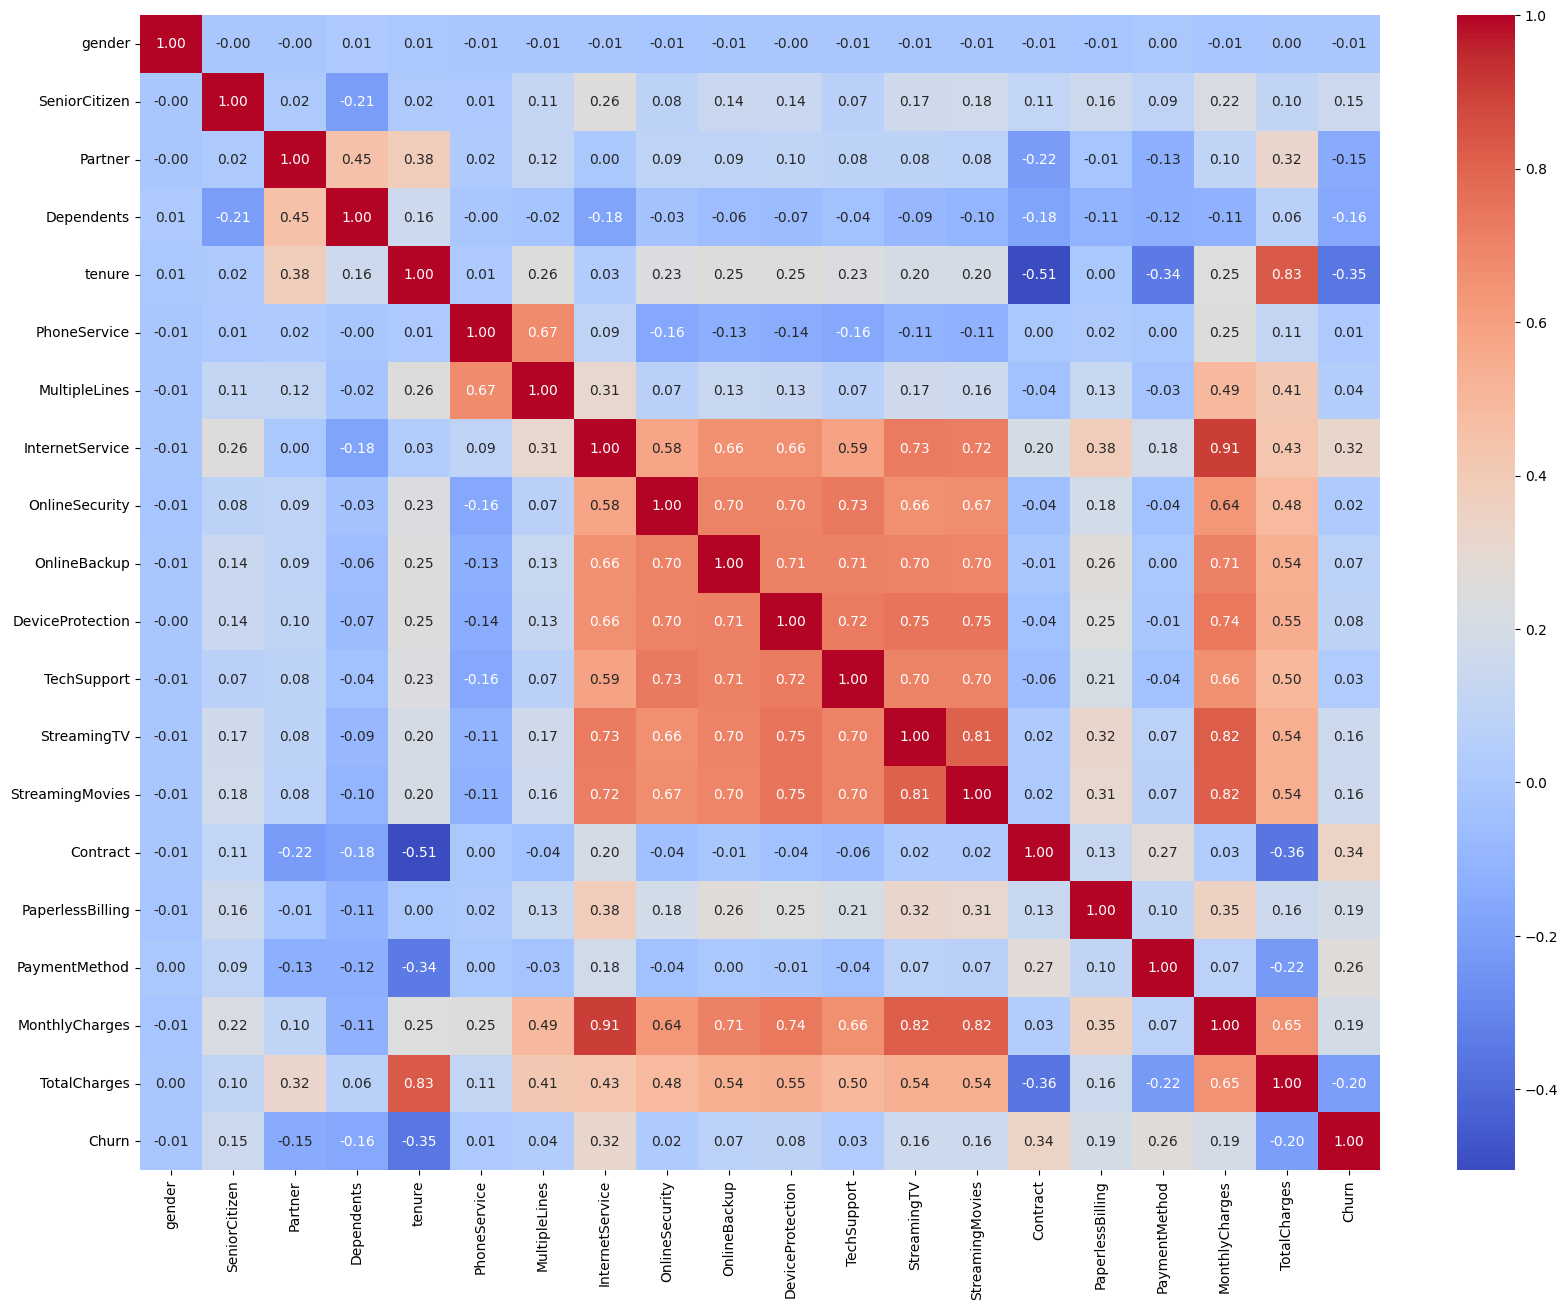

In [13]:
plt.figure(figsize= (20, 15))
sns.heatmap(df.corr(numeric_only= True), annot = True, fmt = '.2f', cmap = 'coolwarm')

# gender seems to be uncorrelated to all [will remove this feature]
# senior citizen is likely to churn
# partner have strong correlation with dependents and negative which is unlikely to churn which explains with tenurity
# long service clients tend to stay 
# availing phone service yields multiple lines which then increases monthly charges
# availing internet service with either dsl or fiber optics increase availment of online security, online backup, device protection, tech support,streaming tv and movies which increases monthly charges
# Entertainment services significantly increase bills, but don’t directly impact churn much
# long-term contracts reduce churn
# certain payment methods (like electronic check) churn more often.
# possibly tied to online users, who churn more easily.
# Higher bills contribute slightly to churn — possibly due to price dissatisfaction or service bundling fatigue.

In [14]:
df_check = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines' , 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies',
'Contract', 'PaymentMethod', 'TotalCharges', 'tenure', 'MonthlyCharges']
def detect_outliers (df, df_check):
    outlier_indices = {}
    for col in df_check:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = max(0, Q1 - 1.5* IQR)
        upper_bound = Q1 + 1.5* IQR
        check_bound = (df[col]< lower_bound) | (df[col] > upper_bound)
        outlier_indices[col] = df[check_bound].index.tolist()
        print(f"{col}: {check_bound.sum()} outliers (range {lower_bound:.2f}–{upper_bound:.2f})")
    return outlier_indices

outliers = detect_outliers (df, df_check)

# outliers in Total Charges needs to be investigated

Partner: 0 outliers (range 0.00–1.50)
Dependents: 0 outliers (range 0.00–1.50)
PhoneService: 680 outliers (range 1.00–1.00)
PaperlessBilling: 0 outliers (range 0.00–1.50)
MultipleLines: 0 outliers (range 0.00–2.50)
InternetService: 0 outliers (range 0.00–2.50)
OnlineSecurity: 0 outliers (range 0.00–2.50)
OnlineBackup: 0 outliers (range 0.00–2.50)
DeviceProtection: 0 outliers (range 0.00–2.50)
TechSupport: 0 outliers (range 0.00–2.50)
StreamingTV: 0 outliers (range 0.00–2.50)
StreamingMovies: 0 outliers (range 0.00–2.50)
Contract: 0 outliers (range 0.00–2.50)
PaymentMethod: 0 outliers (range 0.00–4.00)
TotalCharges: 935 outliers (range 0.00–5491.38)
tenure: 0 outliers (range 0.00–78.00)
MonthlyCharges: 13 outliers (range 0.00–117.00)


In [15]:
charge_ratio = df['TotalCharges'] / (df['MonthlyCharges'] * df['tenure'].replace(0,1))
print(charge_ratio.describe())

# std and mean are within the threshold no need to remove 

count    7032.000000
mean        1.000275
std         0.051159
min         0.689356
25%         0.979546
50%         1.000000
75%         1.019562
max         1.573454
dtype: float64


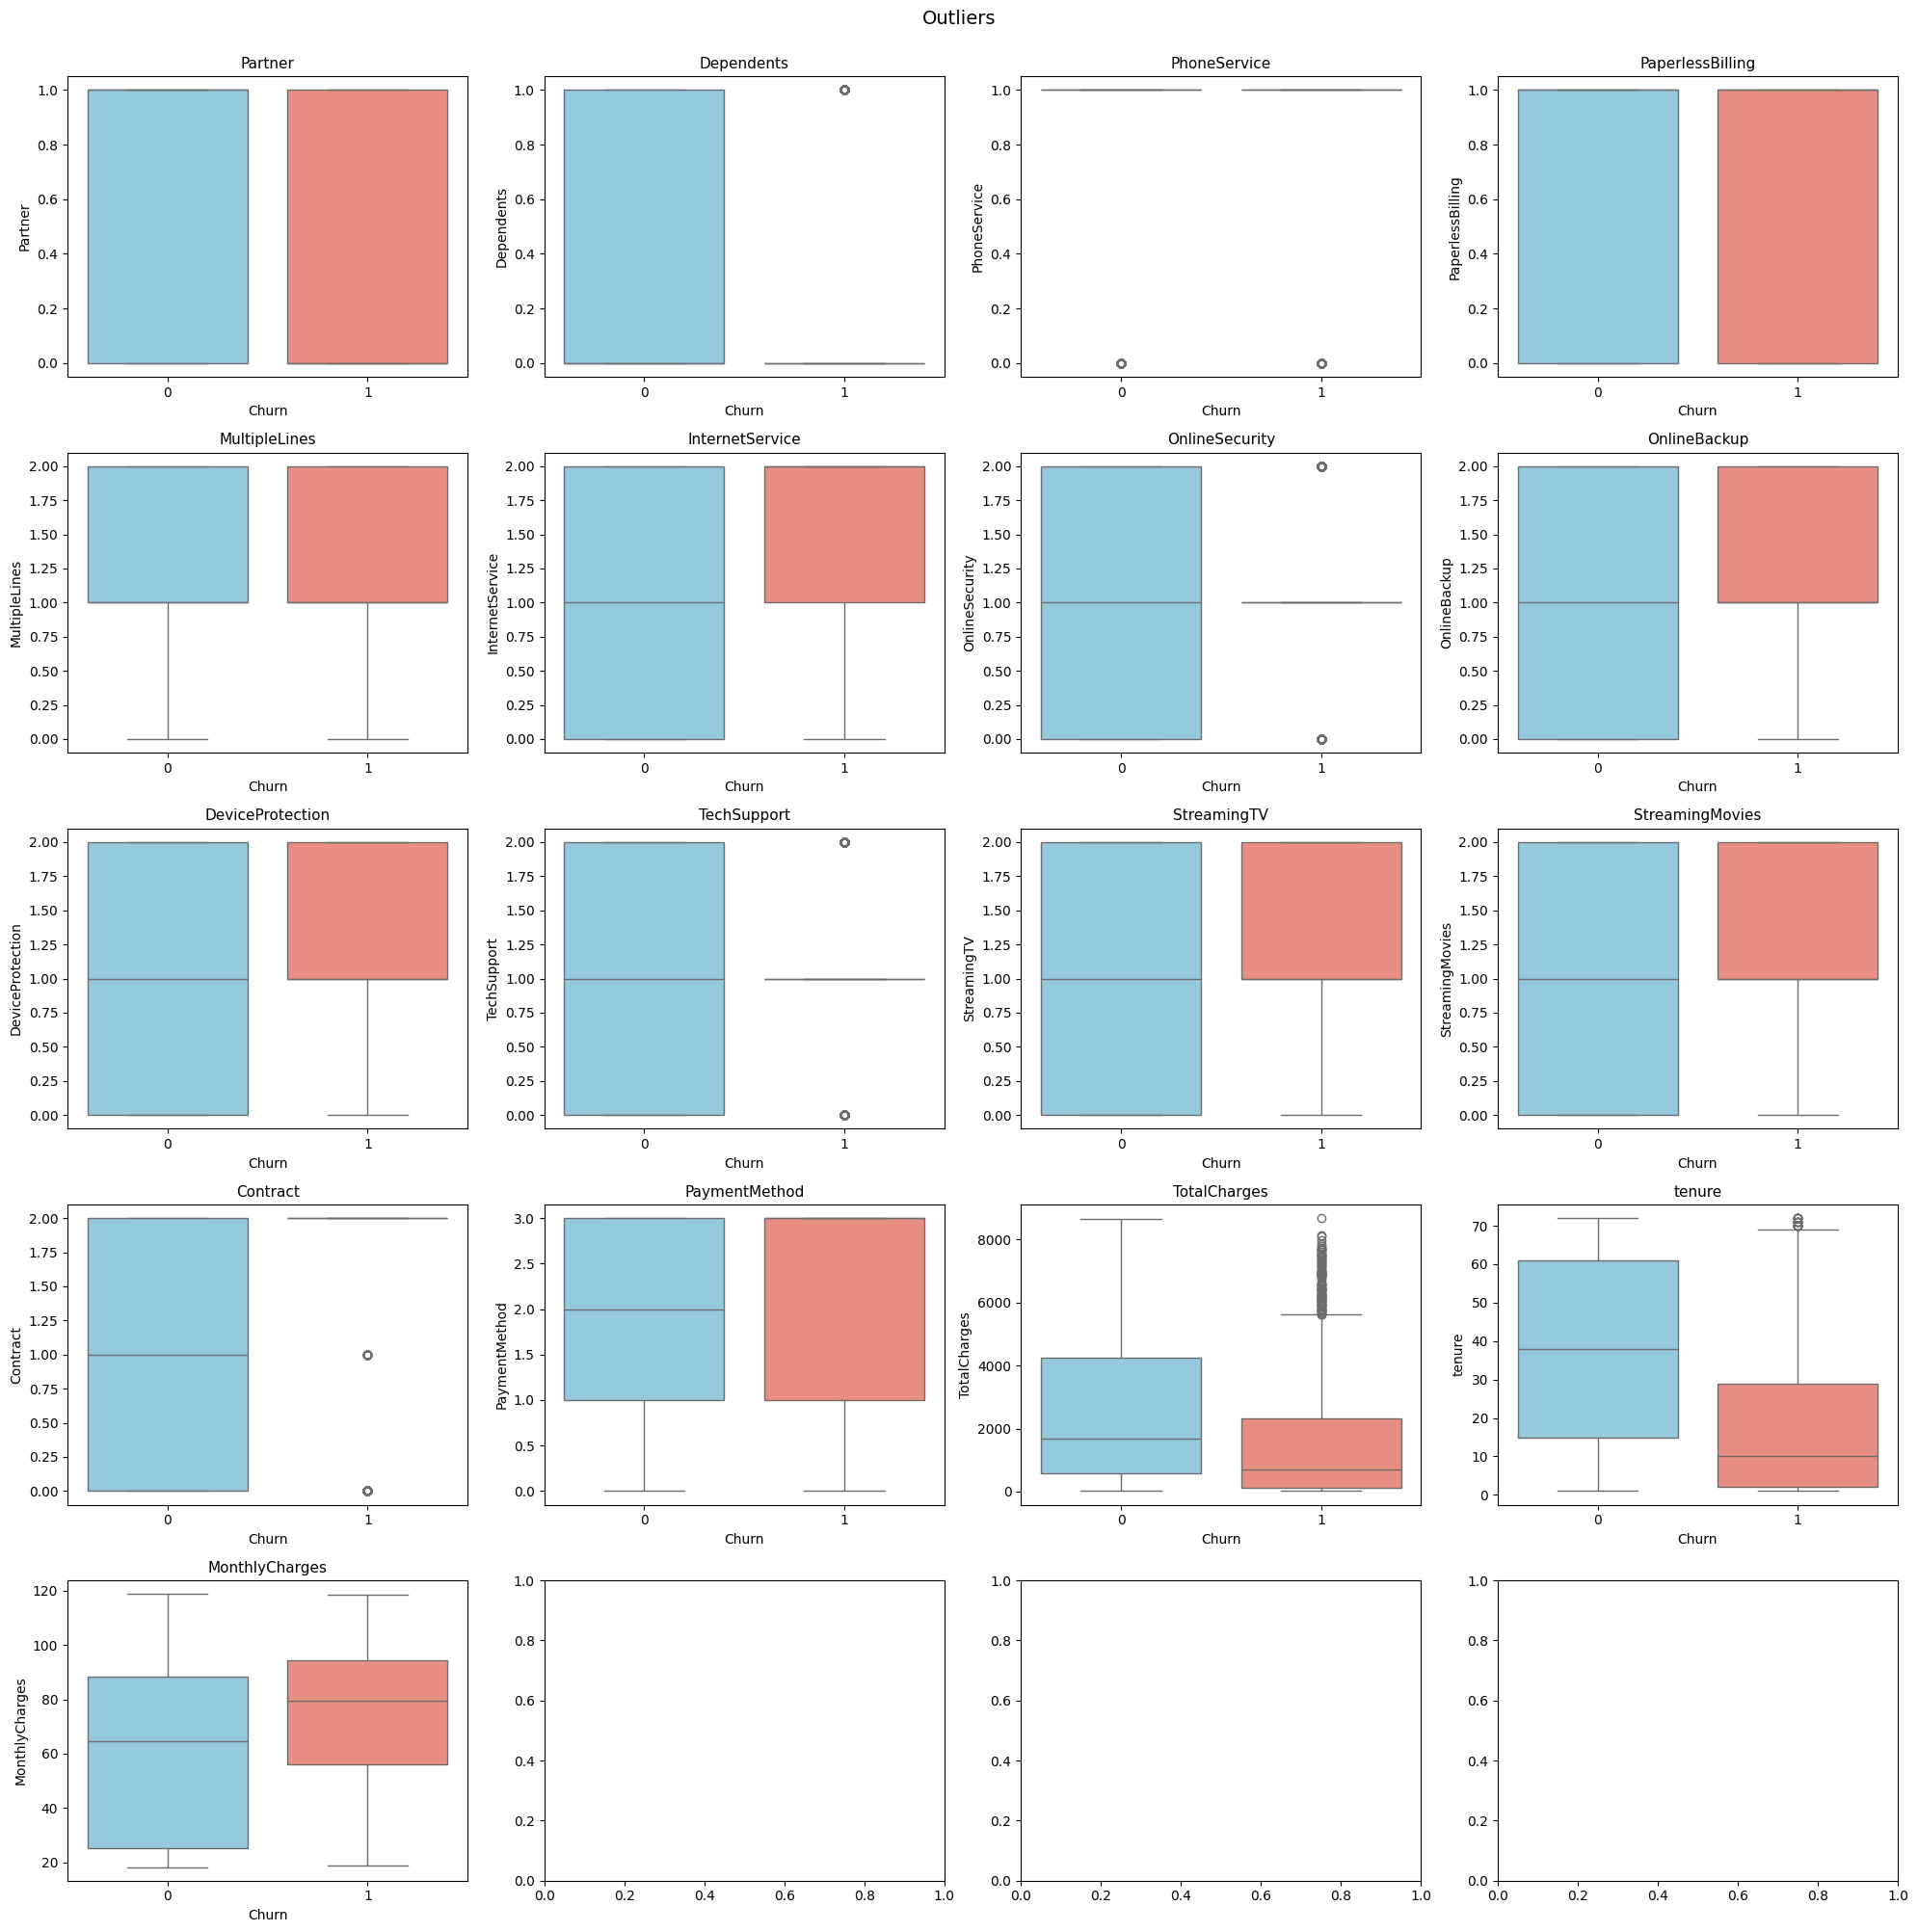

In [16]:
fig, axes = plt.subplots(5, 4, figsize = (20, 20))
axes = axes.flatten()

for idx, feature in enumerate(df_check):
    row = idx //2
    col = idx %2 

    sns.boxplot(
        data = df,
        x = 'Churn',
        y = feature,
        hue = 'Churn',
        ax = axes[idx],
        palette= ['skyblue', 'salmon'],
        legend = False
    )

    axes[idx].set_title(f'{feature}', fontsize = 11)
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(feature)


plt.suptitle('Outliers', fontsize = 14, y = 1.00)
plt.tight_layout()
plt.show()

In [26]:
X.head()

,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,TotalCharges,tenure,MonthlyCharges
0,1,0,0,1,0,1,1,2,1,1,1,1,2,3,29.85,1,29.85
1,0,0,1,0,1,1,2,1,2,1,1,1,0,2,1889.50,34,56.95
2,0,0,1,1,1,1,2,2,1,1,1,1,2,2,108.15,2,53.85
3,0,0,0,0,0,1,2,1,2,2,1,1,0,1,1840.75,45,42.30
4,0,0,1,1,1,2,1,1,1,1,1,1,2,3,151.65,2,70.70


In [21]:
X = df[df_check]
y = df['Churn']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2, stratify= y)

In [ ]:
scaler = RobustScaler()

to_scale = ['TotalCharges', 'tenure', 'MonthlyCharges']
X_train_scaled = scaler.fit_transform(X_train[to_scale])
X_test_scaled = scaler.transform(X_test[to_scale])

X_train_scaled_df = X_train.copy()
X_test_scaled_df  = X_test.copy()

X_train_scaled_df[to_scale] = X_train_scaled
X_test_scaled_df[to_scale]  = X_test_scaled


In [35]:
models = {
    'Logistic Regression':{
        'model': LogisticRegression (random_state= 2, max_iter=2000),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga'],
            'class_weight': ['balanced', {0:1, 1:3}, {0:1, 1:4}]

        }
    },
    'Random Forest':{
        'model': RandomForestClassifier(random_state= 2),
        'params':{
            'n_estimators' : [100, 200],
            'max_depth': [3, 5, 7],
            'min_samples_split': [10, 20],
            'min_samples_leaf': [5, 10],
            'class_weight': [None, 'balanced', 'balanced_subsample']
        }
    },
    'SVC':{
        'model': SVC(random_state = 2, probability= True),
        'params':{
            'C':[0.1, 1, 10],
            'kernel':['linear', 'rbf'],
            'class_weight':['balanced']
        }
    },
    'XGBoost':{
        'model': XGBClassifier(random_state = 2),
        'params': {
            'max_depth': [2, 3],
            'learning_rate': [0.01, 0.05],
            'min_child_weight':[5, 10],
            'subsample': [0.6, 0.7],
            'n_estimators': [100, 200],
            'reg_alpha': [0.1, 1],
            'reg_lambda': [1, 2]
        }
    },
    'LightGBM':{
        'model': LGBMClassifier(random_state= 2),
        'params':{
            'n_estimators': [100, 200],
            'learning_rate':[0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'min_child_samples': [20, 30],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'class_weight': ['balanced']
        }
    },
    'CatBoost':{
        'model': CatBoostClassifier(random_state= 2, verbose = 0, allow_writing_files=False),
        'params':{
            'iterations': [200, 300],
            'learning_rate': [0.01, 0.05],
            'depth':[4, 6],
            'l2_leaf_reg' : [3, 5, 10],
            'border_count':[32, 64],
            'auto_class_weights': ['Balanced'],
            'early_stopping_rounds': [50]
        }
    }
}



In [37]:
results = {}
all_models = {}

for name, config in models.items():
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv = 5,
        n_jobs = -1,
        scoring = 'f1',
        verbose = 1
    )

    grid_search.fit(X_train_scaled_df, y_train)
    all_models[name] = grid_search.best_estimator_

    train_pred = grid_search.best_estimator_.predict(X_train_scaled_df)
    test_pred = grid_search.best_estimator_.predict(X_test_scaled_df)

    results[name] ={
        'best model': grid_search.best_estimator_,
        'best params': grid_search.best_params_,
        'Train Accuracy': accuracy_score(y_train, train_pred),
        'Test Accuracy': accuracy_score(y_test, test_pred),
        'Train F1': f1_score(y_train, train_pred),
        'Test F1': f1_score(y_test, test_pred),
        'Precision': precision_score(y_test, test_pred),
        'Recall': recall_score(y_test, test_pred)
    }

best_model_name= max(results.keys(), key = lambda x: results[x]['Test F1'])
best_model = results[best_model_name]['best model']

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [41]:
summary_data = []

for name, result in results.items():
    summary_data.append({
        'Model': name,
        'Train F1': result['Train F1'],
        'Test F1': result['Test F1'],
        'Overfit Gap': result['Train F1'] - result['Test F1'],
        'Precision': result['Precision'],
        'Recall': result['Recall']
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Test F1', ascending = False)
summary_df = summary_df.round(4)
display(summary_df)

,Model,Train F1,Test F1,Overfit Gap,Precision,Recall
5,CatBoost,0.6545,0.6534,0.0011,0.5370,0.8342
1,Random Forest,0.6667,0.6419,0.0247,0.5316,0.8102
4,LightGBM,0.6650,0.6390,0.0261,0.5310,0.8021
0,Logistic Regression,0.6278,0.6382,-0.0105,0.5311,0.7995
2,SVC,0.6178,0.6319,-0.0141,0.5116,0.8262
3,XGBoost,0.6247,0.5815,0.0432,0.6450,0.5294


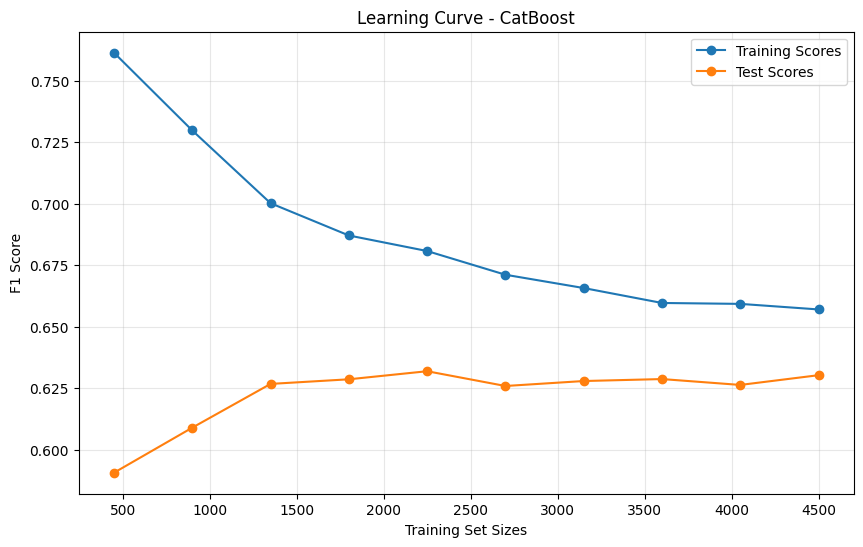

In [42]:
train_sizes, train_scores, test_scores = learning_curve(
    best_model,
    X_train, y_train,
    cv =5,
    scoring = 'f1',
    train_sizes = np.linspace(0.1, 1.0, 10),
    n_jobs = -1
)

plt.figure(figsize = (10, 6))
plt.plot(train_sizes, train_scores.mean(axis = 1), label = 'Training Scores', marker = 'o')
plt.plot(train_sizes, test_scores.mean(axis= 1), label = 'Test Scores', marker = 'o')
plt.xlabel('Training Set Sizes')
plt.ylabel('F1 Score')
plt.title(f'Learning Curve - {best_model_name}')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

In [46]:
cv_scores = cross_val_score(
    best_model,
    X_train_scaled_df, y_train,
    cv = 5,
    scoring = 'f1'
)

print(f'CV F1 Scores: {cv_scores}')
print(f'Mean: {cv_scores.mean():.3f}')
print(f'Std: {cv_scores.std():.3f}')

CV F1 Scores: [0.64383562 0.60440986 0.64966443 0.61245235 0.64109589]
Mean: 0.630
Std: 0.018


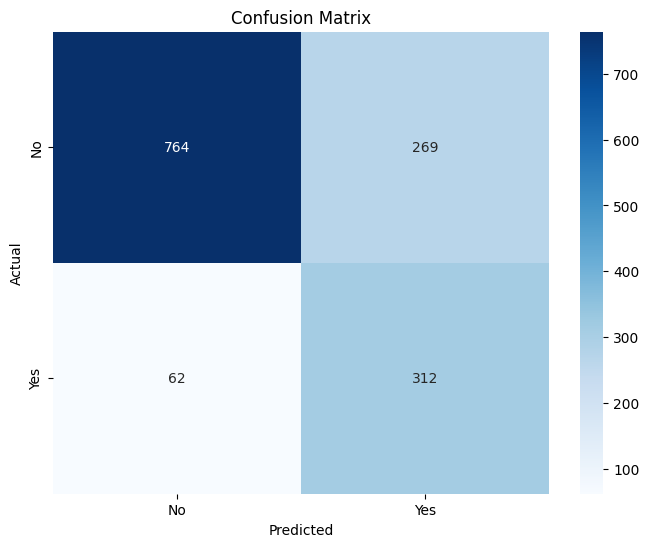

In [45]:
y_pred = best_model.predict(X_test_scaled_df)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels= ['No', 'Yes'],
            yticklabels= ['No', 'Yes'])

plt.xlabel('Predicted')
plt.ylabel('Actual'),
plt.title('Confusion Matrix')
plt.show()